In [1]:
import numpy as numpy
import pandas as pd 

# Preparation des donnees

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Preparation des données

### Les variables Numériques

#### Calcul des Statistiques de base : moyenne, médiane, écart-type, valeurs manquantes


- La moyenne

In [5]:
df.mean(numeric_only=True)

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

- La mediane

In [6]:
df.median(numeric_only=True)

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

- l'ecart type

In [7]:
df.std(numeric_only=True)

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

- Les valeurs Manquantes

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Histogrammes avec matplotlib ou seaborn

In [9]:
import matplotlib as plt
import seaborn as sns

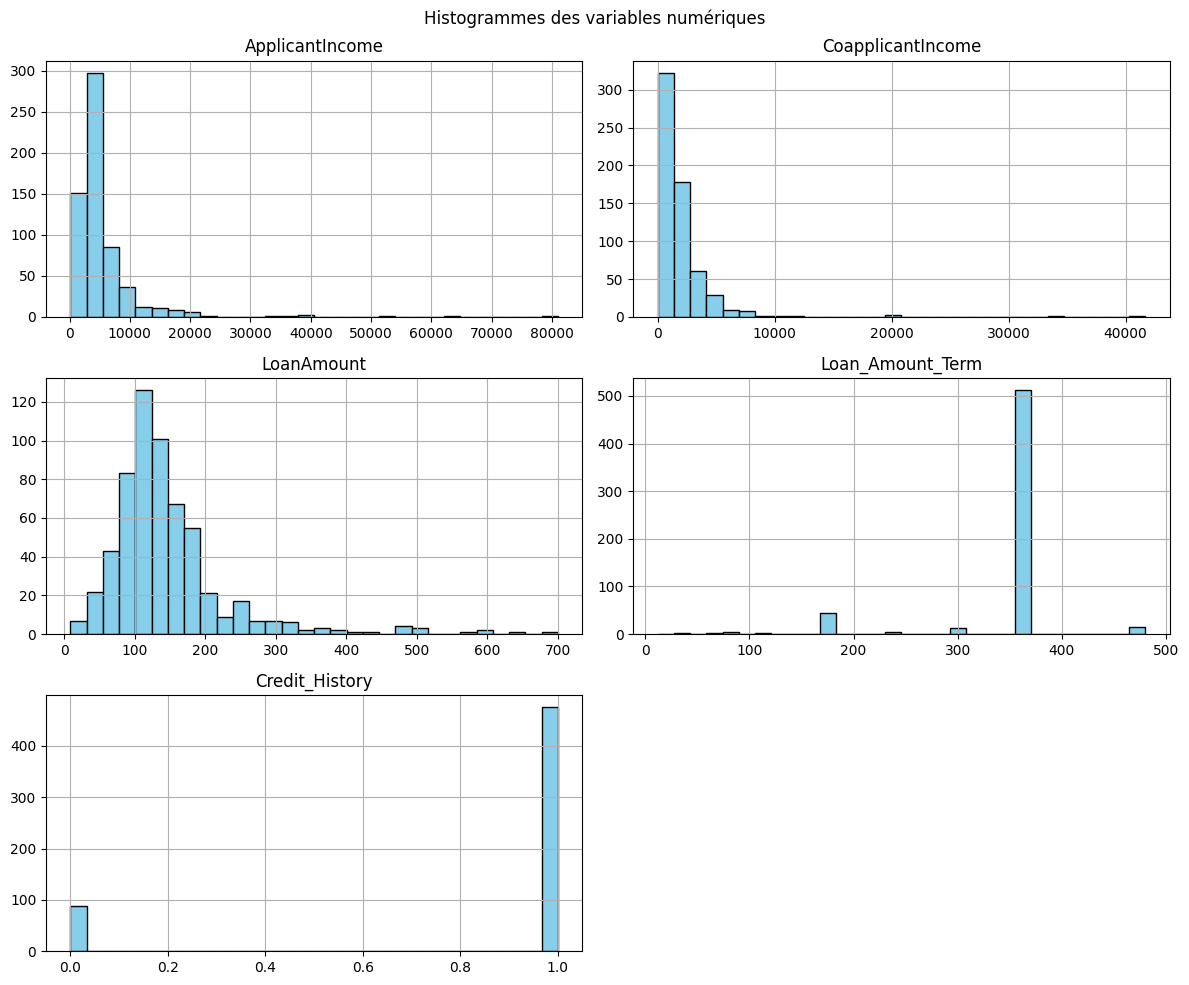

In [10]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogrammes des variables numériques")
plt.tight_layout()
plt.show()

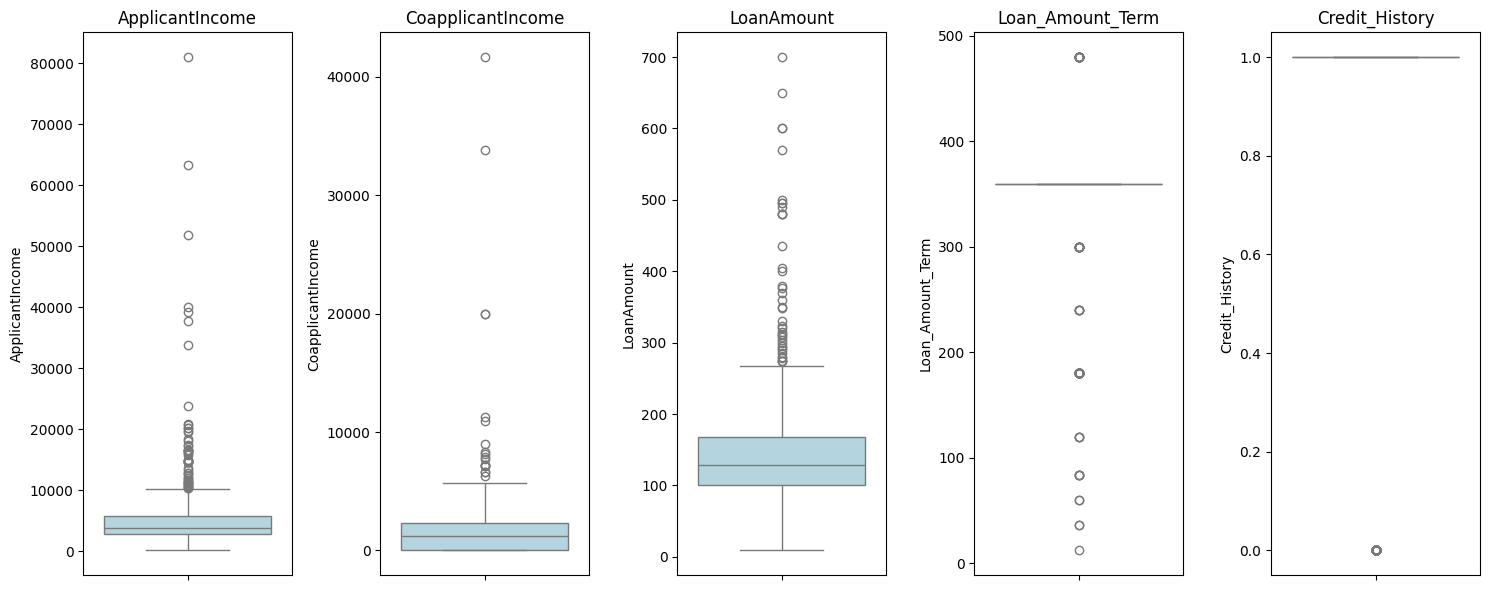

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection automatique des colonnes numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Création des box plots
plt.figure(figsize=(15, 6))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()

plt.show()


### 2. Variables catégorielles

In [12]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Property_Area'].value_counts())


Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


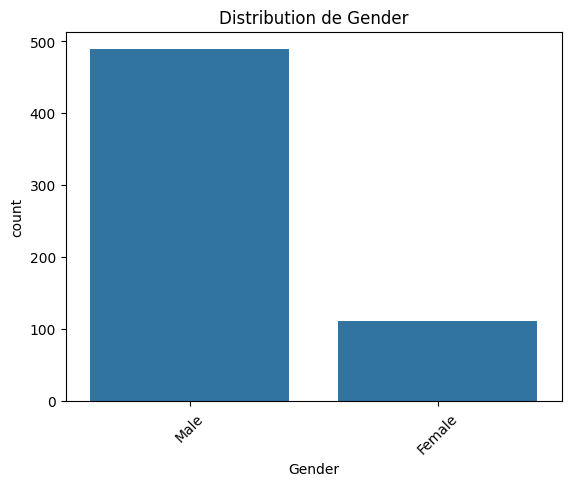

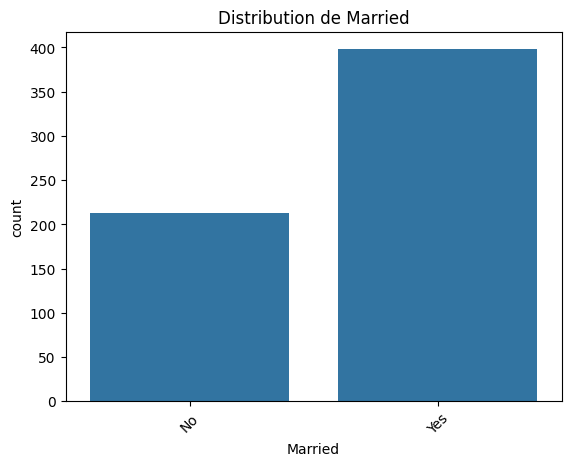

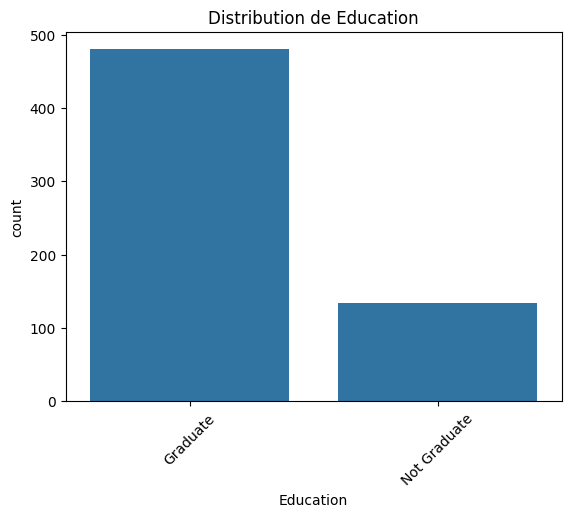

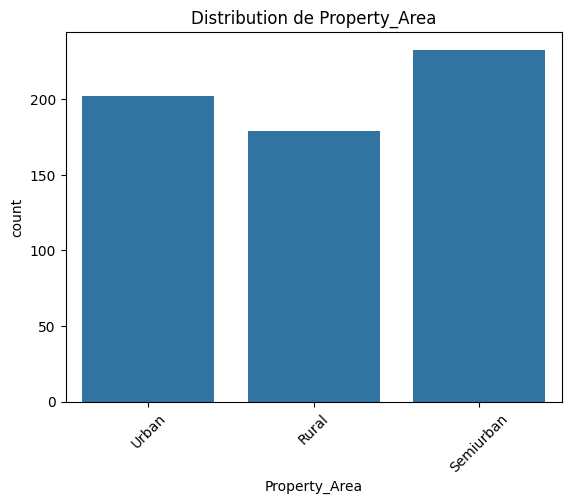

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['Gender','Married', 'Education', 'Property_Area']

for var in cat_vars:
    sns.countplot(x=var, data=df)
    plt.title(f"Distribution de {var}")
    plt.xticks(rotation=45)
    plt.show()


In [14]:
missing = df.isnull().sum()
# on divise le nombre de valeurs manquantes par le nombre total de lignes pour chaque colonne.
# on multiplie par 100 → tu obtiens le pourcentage de données manquantes pour chaque colonne.
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Valeurs manquantes': missing, 'Pourcentage (%)': missing_percent})
# on n’affiches que les variables qui ont au moins une valeur manquante.
print(missing_df[missing_df['Valeurs manquantes'] > 0])

                  Valeurs manquantes  Pourcentage (%)
Gender                            13         2.117264
Married                            3         0.488599
Dependents                        15         2.442997
Self_Employed                     32         5.211726
LoanAmount                        22         3.583062
Loan_Amount_Term                  14         2.280130
Credit_History                    50         8.143322


In [15]:
print(df['Loan_Status'].value_counts())


Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Nettoyage des données

- identification des nan dans var categorielles

In [17]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area', 'Loan_Status']

# Afficher les value_counts pour chaque variable catégorielle
for col in cat_cols:
    print(f"Value counts pour {col}:\n")
    print(df[col].value_counts(dropna=False))  
    print("\n" + "-"*50 + "\n")

Value counts pour Gender:

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

--------------------------------------------------

Value counts pour Married:

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

--------------------------------------------------

Value counts pour Dependents:

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64

--------------------------------------------------

Value counts pour Education:

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

--------------------------------------------------

Value counts pour Self_Employed:

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

--------------------------------------------------

Value counts pour Property_Area:

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

--------------------------------------------------

Value counts pour Loan_S

- mapping des varaibles categorielles

In [18]:
mappings = {
    'Gender': {'Male': 0, 'Female': 1},
    'Married': {'No': 0, 'Yes': 1},
    'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
    'Education': {'Not Graduate': 0, 'Graduate': 1},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Rural': 0, 'Urban': 1, 'Semiurban': 2}
}


for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)


df_cleaned = df.dropna(subset=mappings.keys())

- verifiions

In [19]:
df_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,Y
1,LP001003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y


- nous allons convertir nos variables numeriques de type float en int

In [20]:
#colonnes a convertir
float_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed',
              'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# on supprime les ligne qui contiennent des nan
df_cleaned = df.dropna(subset=float_cols)

for col in float_cols:
    df_cleaned[col] = df_cleaned[col].astype(int)

C:\Users\ABDOUL AZIZ NDAW\AppData\Local\Temp\ipykernel_7608\1974820899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(int)
C:\Users\ABDOUL AZIZ NDAW\AppData\Local\Temp\ipykernel_7608\1974820899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(int)
C:\Users\ABDOUL AZIZ NDAW\AppData\Local\Temp\ipykernel_7608\1974820899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

- verifions les types à present

In [21]:
# Afficher le type de chaque colonne pour vérifier
print(df_cleaned.dtypes)

Loan_ID              object
Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area         int64
Loan_Status          object
dtype: object


- realisons egalement le mapping de la variable de sortie (le target)

In [22]:
df_cleaned['Loan_Status'] = df_cleaned['Loan_Status'].map({'Y': 1, 'N': 0})

C:\Users\ABDOUL AZIZ NDAW\AppData\Local\Temp\ipykernel_7608\3513740966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Loan_Status'] = df_cleaned['Loan_Status'].map({'Y': 1, 'N': 0})


In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            480 non-null    object
 1   Gender             480 non-null    int64 
 2   Married            480 non-null    int64 
 3   Dependents         480 non-null    int64 
 4   Education          480 non-null    int64 
 5   Self_Employed      480 non-null    int64 
 6   ApplicantIncome    480 non-null    int64 
 7   CoapplicantIncome  480 non-null    int64 
 8   LoanAmount         480 non-null    int64 
 9   Loan_Amount_Term   480 non-null    int64 
 10  Credit_History     480 non-null    int64 
 11  Property_Area      480 non-null    int64 
 12  Loan_Status        480 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 52.5+ KB


In [24]:
df_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508,128,360,1,0,0
2,LP001005,0,1,0,1,1,3000,0,66,360,1,1,1
3,LP001006,0,1,0,0,0,2583,2358,120,360,1,1,1
4,LP001008,0,0,0,1,0,6000,0,141,360,1,1,1
5,LP001011,0,1,2,1,1,5417,4196,267,360,1,1,1


In [25]:
pd.isnull(df_cleaned).sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### MODELISATION

In [26]:
# imort des fonctions de scikit learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)
# importation des algorithmes
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import seaborn as sns

In [27]:
# Séparation des variables
X = df_cleaned.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df_cleaned['Loan_Status']

In [28]:
# Sepaprtion des données en entrainement et en test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
# Normalisation
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
# nous choisissons d'entrainer le modele avec 05 algo
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True, class_weight='balanced')
}


=== Logistic Regression ===
Accuracy: 0.78


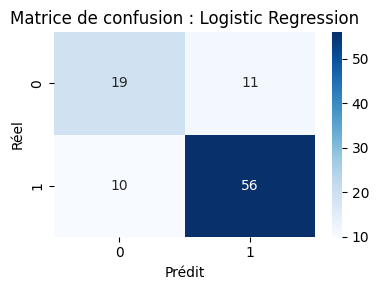

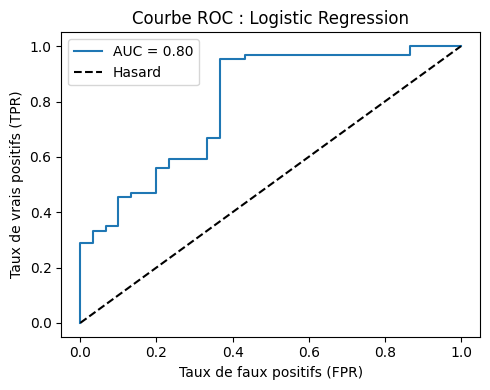

Classification report :
              precision    recall  f1-score   support

           0       0.66      0.63      0.64        30
           1       0.84      0.85      0.84        66

    accuracy                           0.78        96
   macro avg       0.75      0.74      0.74        96
weighted avg       0.78      0.78      0.78        96


=== Decision Tree ===
Accuracy: 0.69


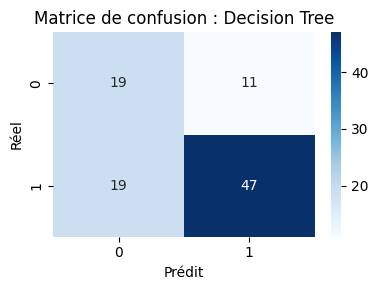

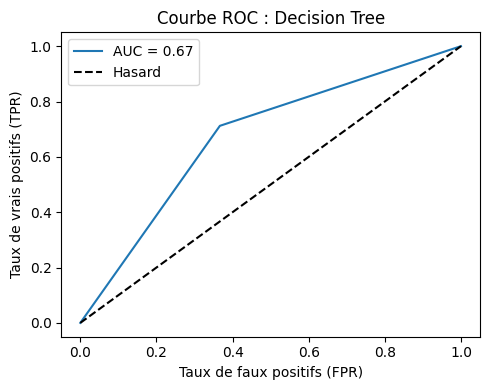

Classification report :
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        30
           1       0.81      0.71      0.76        66

    accuracy                           0.69        96
   macro avg       0.66      0.67      0.66        96
weighted avg       0.71      0.69      0.70        96


=== Random Forest ===
Accuracy: 0.81


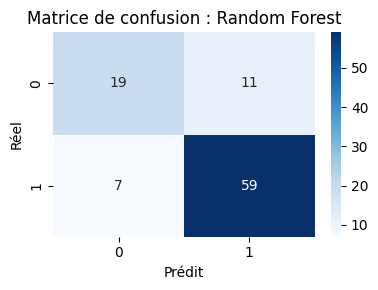

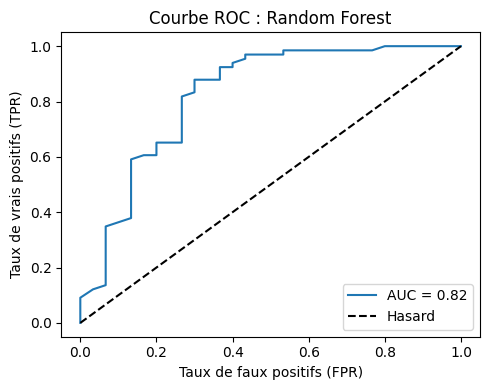

Classification report :
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        30
           1       0.84      0.89      0.87        66

    accuracy                           0.81        96
   macro avg       0.79      0.76      0.77        96
weighted avg       0.81      0.81      0.81        96


=== Gradient Boosting ===
Accuracy: 0.82


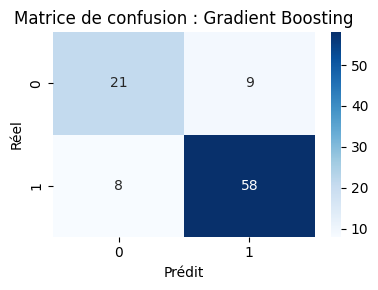

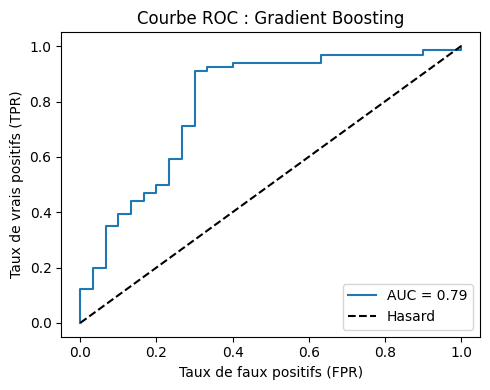

Classification report :
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.87      0.88      0.87        66

    accuracy                           0.82        96
   macro avg       0.79      0.79      0.79        96
weighted avg       0.82      0.82      0.82        96


=== SVM ===
Accuracy: 0.79


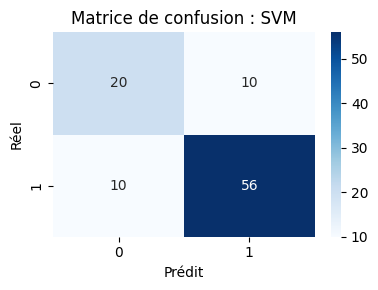

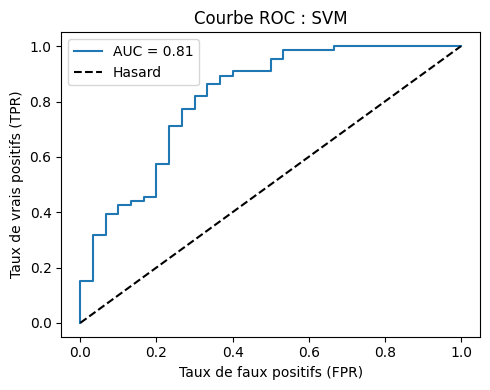

Classification report :
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        30
           1       0.85      0.85      0.85        66

    accuracy                           0.79        96
   macro avg       0.76      0.76      0.76        96
weighted avg       0.79      0.79      0.79        96



In [31]:
# pour chaque modele, nous allons avoir le score (l'accuracy) et les metrics 
for name, model in models.items():
    print(f"\n=== {name} ===")

    # Entraînement
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # 1. Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")

    # 2. Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matrice de confusion : {name}")
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.tight_layout()
    plt.show()

    # 3. ROC & AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Hasard")
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC : {name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 4. Rapport de classification
    print("Classification report :")
    print(classification_report(y_test, y_pred, digits=2))


- je vous laisse me dire le meilleure modele qu'il faut retenir

Après mur reflexion, nous avons choisi d'utiliser le modele de regression logistique.
Parceque c'est le seul modele qu'on ait appris en cours avec la regression linéaire. Nous pensons qu'on pourrait facilement l'assimiler.

- enregsitrer le modele (standardisation et le modele que a la meilleure performance)

In [32]:
best_model = LogisticRegression(class_weight='balanced')
best_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced')

In [33]:
import joblib

# Récupère le modèle de régression logistique
logistic_model = models["Logistic Regression"]

# (Ré)entraîne-le au cas où tu veux être sûr
logistic_model.fit(X_train_scaled, y_train)

# Sauvegarde du modèle
joblib.dump(logistic_model, 'modele_logistic_regression.pkl')
print("Modèle Logistic Regression sauvegardé sous le nom : modele_logistic_regression.pkl")


Modèle Logistic Regression sauvegardé sous le nom : modele_logistic_regression.pkl


In [34]:
joblib.dump(scaler, 'scaler_minmax.pkl')
print(" Scaler sauvegardé sous le nom : scaler_minmax.pkl")

 Scaler sauvegardé sous le nom : scaler_minmax.pkl


In [35]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
